In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# 因为本次的数据集是.mat格式的，无法直接通过txt文件读取，因此我们需要通过这个方法来读取
from scipy.io import loadmat

data = loadmat('./ex3data1.mat')
x = data['X']
m = len(x)
y = data['y']

这个数据的识别结果是 0


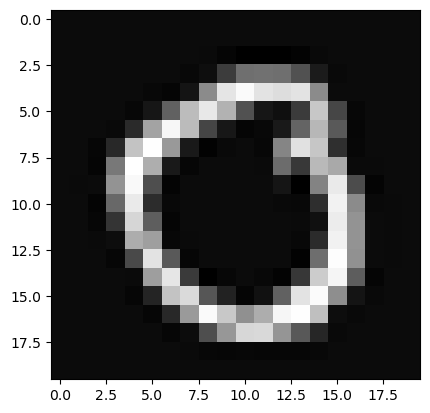

In [16]:
need_show_img_count = 100
show_img = x[need_show_img_count, :].reshape((20, 20))
print("这个数据的识别结果是", 0 if y[need_show_img_count, 0] == 10 else y[need_show_img_count, 0])
# 画出这幅图
plt.imshow(show_img, cmap='gray')
plt.show()

(200, 200)


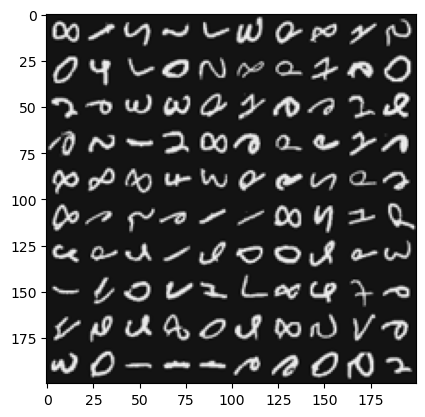

In [17]:
random_selected_index = np.random.choice(len(x), 100)
need_show_data = x[random_selected_index]
need_show_img = None

for i in range(10):
    tmp_array = need_show_data[i * 10].reshape(20, 20)
    for j in range(1, 10):
        tmp_array = np.concatenate((tmp_array, need_show_data[i * 10 + j].reshape(20, 20)), axis=1)
    need_show_img = tmp_array if need_show_img is None else np.concatenate((need_show_img, tmp_array), axis=0)
print(need_show_img.shape)
plt.imshow(need_show_img, cmap='gray')
plt.show()

In [18]:
# 定义一些函数
# sigmoid 函数
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


# 预测函数
def h_fun(theta_param, x_param):
    return sigmoid(x_param @ theta_param)



In [19]:
# 定义损失函数
def cost_fun(theta_param, x_param, y_param, l):
    '''
    get cost Value
    :param theta_param: theta
    :param x_param: x
    :param y_param: y
    :param l: lambda
    :return: cost value
    '''
    theta_param = theta_param.reshape((x_param.shape[1], 1))
    tmp = h_fun(theta_param, x_param)
    first = np.multiply(y_param, np.log(tmp))
    second = np.multiply((1 - y_param), np.log(1 - tmp))
    return - 1 / m * (np.sum(first + second)) + l / (2 * m) * np.sum(np.power(theta_param, 2))


def gradient_fun(theta_param, x_param, y_param, l):
    '''
    get Gradient Value
    :param theta_param: theta
    :param x_param: x
    :param y_param: y
    :param l: lambda
    :return: gradient
    '''
    theta_param = theta_param.reshape((x_param.shape[1], 1))
    cpy_theta = theta_param.copy()
    tmp = h_fun(theta_param, x_param)
    theta_param = (x_param.T @ (tmp - y_param)) / len(x_param)
    theta_param[1:, :] += l / len(x_param) * cpy_theta[1:, :]
    return theta_param

In [20]:
import scipy.optimize as opt

# 准备下X
x = data['X']
x = np.insert(x, 0, values=np.ones(m), axis=1)


def one_vs_all(x_param, y_param, all_count, l):
    '''
    :param x_param: x
    :param y_param: y
    :param all_count: 待分类的总数
    :param l: lambda
    :return: all_theta
    '''
    all_theta = np.zeros((all_count, x_param.shape[1]))
    for i in range(all_count):
        theta = np.zeros(x_param.shape[1])
        y_i = np.array([1 if label % 10 == i else 0 for label in y_param])
        y_i = y_i.reshape((m, 1))
        # result = opt.fmin_tnc(func=cost_fun, x0=theta, fprime=gradient_fun, args=(x_param, y_i, l))
        # all_theta[i, :] = result[0]
        result = opt.minimize(fun=cost_fun, x0=theta, jac=gradient_fun, args=(x_param, y_i, l), method='TNC')
        all_theta[i, :] = result.x
    return all_theta


theta_result = one_vs_all(x, y, 10, 1)

In [21]:
from sklearn.metrics import classification_report


def predict_one_vs_all(all_theta_param, x_param):
    '''
    :param all_theta_param: all theta
    :param x_param: x
    :return: y_pred
    '''
    h = h_fun(all_theta_param.T, x_param)
    #q: np.argmax是干嘛的
    # a: 返回最大值的索引
    h_argmax = np.argmax(h, axis=1)
    return h_argmax


y_pred = predict_one_vs_all(theta_result, x)
y_answer = np.array([0 if label == 10 else label[0] for label in y])
print(classification_report(y_answer, y_pred))
accuracy = np.mean(y_pred == y_answer)
print('accuracy = {0}%'.format(accuracy * 100))
# y_answer

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       500
           1       0.95      0.99      0.97       500
           2       0.95      0.92      0.93       500
           3       0.95      0.91      0.93       500
           4       0.95      0.95      0.95       500
           5       0.92      0.92      0.92       500
           6       0.97      0.98      0.97       500
           7       0.95      0.95      0.95       500
           8       0.93      0.92      0.92       500
           9       0.92      0.92      0.92       500

    accuracy                           0.94      5000
   macro avg       0.94      0.94      0.94      5000
weighted avg       0.94      0.94      0.94      5000

accuracy = 94.42%
